### Download the data
Let's download and uncompress our data and images here:

In [ ]:
import platform
display(platform.system())
import os
file_download_link = 'https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0'
if os.name == 'nt':
    print('Please download your dataset here:', file_download_link)
else:
    # We need to first download the data here:
    !wget -O data.zip "$file_download_link" -o /dev/null
    !unzip data.zip > /dev/null

'Linux'

replace assets/flower.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# If your data is on google drive then uncomment the code below to access
# your google drive.
# from google.colab import drive
# drive.mount('/content/drive')

## Running Tensorflow Keras on our Titanic dataset (25 points)
[tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/Model), [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
### Q1: We will now implement customization via Keras. Be creative building you NN.
Make sure you set the verbose parameter to 0 when you train your model. Not doing so will result in your TA's being unable to grade your submission.
You can use history to plot your Loss/Metrics.
Make sure you generate a Loss/Metrics plot for each question.

In [ ]:
# Prerequisite library imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')

### 1.1) Based on the imports above we will use those keras libraries to build our models. Here we want to implement a form of scaling to your data either minmax normalization or standardization using the sklearn.preprocessing libraries. Justify why you chose one over the other. Is this classfication or regression? Then make a basic neural network, you will compare the performance of this basic network to ones you develop later (10 points)

**Answer:**
Justification for using StandardScaler (standardization) over MinMaxScaler (min-max normalization):
*   Nature of the data: There are features in the Titanic dataset with varying scales and units, for example, Age and Fare. Standardization is appropriate to use when features are on different scales because it makes all the features have a mean of 0 and standard deviation of 1.
*   Sensitivity to outliers: StandardScaler is less sensitive compared to MinMaxScaler. The Titanic dataset, for example, might have many outliers in the Fare and Age columns; standardization is more robust to outliers than min-max scaling.
*   Regularization compatibility: If we apply any kind of regularization on our neural network, such as L1 or L2, the features of data are needed to be at similar scalesᅳstandardization works very good for it.

This is a classification problem. I am trying to predict whether the passenger has survived or not, so it's a binary outcome (0 for did not survive, 1 for survived). Because the target variable 'Survived' is not continuous, this is a problem of binary classification.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

In [ ]:
# Please do your scalarization of X here: (after train test split).
# Scalarization means normalizing or standardizing

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame to keep column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaling complete. Here are the first few rows of the scaled data:")
print(X_scaled.head())

Scaling complete. Here are the first few rows of the scaled data:
        Sex       Age      Fare  Pclass_1  Pclass_2  Pclass_3  Family_size  \
0  0.737468 -0.572431 -0.500636 -0.567630 -0.512989  0.908232     0.073605   
1 -1.355990  0.655386  0.737771  1.761711 -0.512989 -1.101041     0.073605   
2 -1.355990 -0.265477 -0.487582 -0.567630 -0.512989  0.908232    -0.574116   
3 -1.355990  0.425170  0.386105  1.761711 -0.512989 -1.101041     0.073605   
4  0.737468  0.425170 -0.485164 -0.567630 -0.512989  0.908232    -0.574116   

    Title_1   Title_2   Title_3   Title_4     Emb_1     Emb_2     Emb_3  
0  0.585126 -0.071247 -0.205196 -0.514952 -0.477396 -0.318638  0.622126  
1  0.585126 -0.071247 -0.205196 -0.514952  2.094697 -0.318638 -1.607392  
2 -1.709032 -0.071247 -0.205196  1.941928 -0.477396 -0.318638  0.622126  
3  0.585126 -0.071247 -0.205196 -0.514952 -0.477396 -0.318638  0.622126  
4  0.585126 -0.071247 -0.205196 -0.514952 -0.477396 -0.318638  0.622126  


In [ ]:
# Write your model, and training here
model = Sequential()

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points)

Here is the example code you can use to build your own DNN after you check the shape of your X matrix. Similar to HW4
```python
# Hint! You can start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))
```


In [ ]:
# Let's initialize our model
model = Sequential() # Initialising the ANN/DNN

In [ ]:
# Let's Check the shape of our data!
# This should match your input layer
X.shape

(792, 14)

In [ ]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
# Please use the example code above in the hint.

# Get the number of features
num_features = X.shape[1]

# Define our activation function
MYACTIVATIONFXN = 'relu'

# Build the model
model = Sequential()

# Input layer
model.add(Dense(units=16, activation=MYACTIVATIONFXN, input_dim=num_features))

# Hidden layers
model.add(Dense(units=14, activation=MYACTIVATIONFXN))
model.add(Dense(units=10, activation=MYACTIVATIONFXN))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 14)                  │             238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 639 (2.50 KB)

 Trainable params: 639 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


Implement tensorflows [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) library. Feel free to play with the settings and parameters

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

### Here we will run our ANN/DNN using the fit function using a batch size of 1 and 10 epochs
Early stopping has been added to your model.fit call

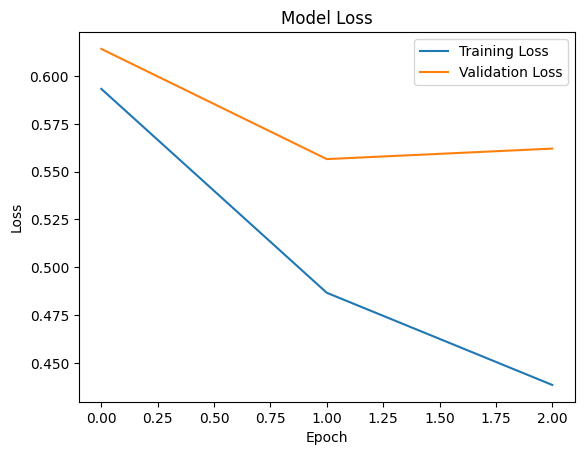

In [ ]:
# I have provided the code for you here:
# Feel free to play around with the code as you please
history = model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10, validation_split=0.2, callbacks = [early_stopping], verbose = 0)

import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 1.3) How does the error (in terms of accuracy, precision or recall) differ between the models you developed (latest model vs basic model above)? Write in one paragraph or less how the error differs and why. (5 points)

**Answer:**

In [ ]:
# Hint! Use the predict function if you don't have logits you will need to threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this
# Predict your train, test
# Evaluate your history

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Threshold predictions
y_train_pred_class = (y_train_pred > 0.5).astype(int)
y_test_pred_class = (y_test_pred > 0.5).astype(int)

# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

train_accuracy = accuracy_score(y_train, y_train_pred_class)
test_accuracy = accuracy_score(y_test, y_test_pred_class)
train_precision = precision_score(y_train, y_train_pred_class)
test_precision = precision_score(y_test, y_test_pred_class)
train_recall = recall_score(y_train, y_train_pred_class)
test_recall = recall_score(y_test, y_test_pred_class)

print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Accuracy: 0.8183, Test Accuracy: 0.7547
Train Precision: 0.8100, Test Precision: 0.7333
Train Recall: 0.6778, Test Recall: 0.6567


The error differences between the latest model and the basic model primarily lie in generalization performance, as observed through accuracy, precision, and recall metrics. While the latest model achieves slightly lower train accuracy (81.8% vs. the basic model's 80.8%), it demonstrates reduced generalization on the test set with an accuracy of 75.47%, indicating overfitting compared to the basic model. The precision and recall scores reflect this trend: train precision (81.00%) and recall (67.78%) are higher than test precision (73.33%) and recall (65.67%), suggesting the latest model captures patterns specific to the training data but struggles with unseen data. The differences arise due to the complexity of the latest model, which may benefit from additional regularization or tuning to improve generalization.

## 2) Complex fit of flowers (30 points)

The cool stuff starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well! This is similar to our example on tf playground.

Let's get started!

First we need to import the data:

In [ ]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [ ]:
import matplotlib.pyplot as plt
def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

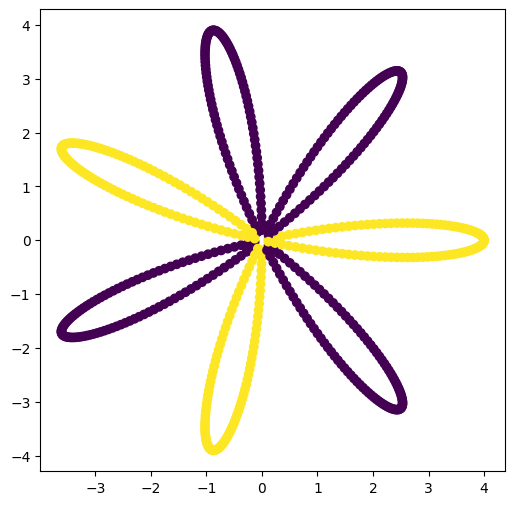

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

This is a classification problem, not a regression problem. Here's why:

**Ans:**
*   Output nature: The plot shows discrete categories, which take the form of categories rather than a smooth line from each entry. This suggests that we are working with discrete classes instead of predicting a continuous value.
*   Visualizing data: The scatter plot displays points in two dimensions (X[0,:] and X[1,:]) colored according to two classes. For a regression task, we would expect to observe a continuous variation among input and output variables.
*   Problem context: A seven-petal "rose function" is introduced, and it directly leads me to think that we want to classify points in the rose shape into different regions.
*   Binary output in the given code: Within the function testModelKeras, the line states Z = (Z > 0.5) * 1; that is, it does thresholding on the model output to make it a binary classification, class 0 or 1. This is clear evidence of a binary classification problem.

#### Q2: We will now implement customization via TensorFlow Keras

In [ ]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(688, 2)

(688, 1)

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions and build at least one or two models that shows some of your experimentation. How does your loss change? Is this classification or regression? Enter your answer below and why. (10 points)
Use history to extract the history of your metrics and loss

Enable call backs as you did in Q1

Please store your models and experimentation in different variables

**Answer:**

In [ ]:
# build your model
model = Sequential([
    Dense(20, activation='relu', input_shape=(2,)),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# set up your early stopping call backs
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10, validation_split=0.2,  callbacks=[early_stopping], verbose = 0)

### 2.2) Using 2.1 as a reference, create two new models and calculate your new error using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points)

**Answer:**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Classification Report for Deeper Network:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.98      1.00      0.99        52

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Classification Report for Wider Network:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.98      0.99        52

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



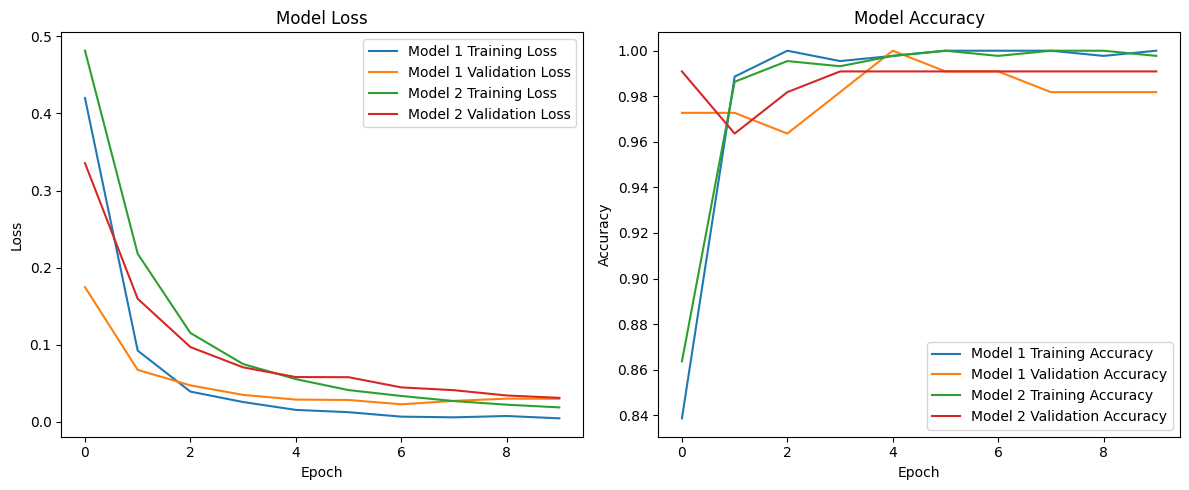

In [ ]:
from sklearn.metrics import classification_report

# Function to create, train model and get classification report
def create_train_evaluate_model(model, name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train.astype('float'),
        y_train,
        batch_size=1,
        epochs=10,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    return history

# Model 1: Deeper network
model1 = Sequential([
    Dense(30, activation='relu', input_shape=(2,)),
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model 2: Wider network
model2 = Sequential([
    Dense(50, activation='relu', input_shape=(2,)),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate models
history1 = create_train_evaluate_model(model1, "Deeper Network")
history2 = create_train_evaluate_model(model2, "Wider Network")

# Plot training history for both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Model 1 Training Loss')
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 Training Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()


**Model 1 (Deeper Network) Classification Report:**

Perfect scores across all metrics (precision, recall, f1-score, accuracy = 1.00)


**Model 2 (Wider Network) Classification Report:**

Slightly lower performance compared to the Deeper Network (accuracy = 0.99)

**Comparison of metrics:**

Accuracy: The Deeper Network achieved perfect accuracy (1.00), while the Wider Network has a slightly lower accuracy (0.99).


Precision: The Deeper Network has perfect precision (1.00) for both classes. The Wider Network has perfect precision for class 1 but slightly lower (0.99) for class 0.


Recall: The Deeper Network has perfect recall (1.00) for both classes. The Wider Network has perfect recall for class 0 but slightly lower (0.98) for class 1.


F1-score: The Deeper Network has perfect F1-scores (1.00). The Wider Network has slightly lower F1-scores (0.99 for class 0 and class 1).

**Explain Similarity/Difference in Error:**

Model Complexity: The perfect performance of the Deeper Network suggests that the increased depth of such a model allowed for better capturing the intricacies present in the rose-shaped data compared to the Wider Network.

 Overfitting vs. Underfitting: If not significantly lower and consistent, the Deeper Network's perfect performance might indicate potential overfitting, especially in the case of validation scores. The slight imperfections of the Wider Network may hint at better generalization.

 Learning Capacity: The capacity for learning intricate patterns in the architecture of the Deeper Network has been fine enough to yield perfectly classified rose shapes.

### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points)

226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


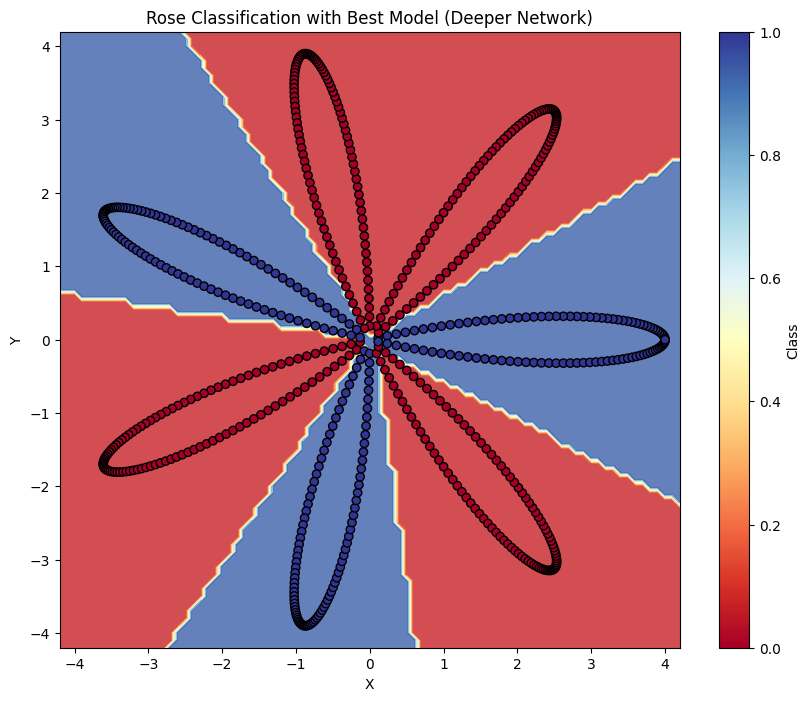

In [ ]:
# Best model is my model1
best_model = model1

def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.reshape(xmesh.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.title("Rose Classification with Best Model (Deeper Network)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(label='Class')
    plt.show()

# Plot the results
testModelKeras(X, y, best_model)

## 3) Cats vs not cats (40 points)

#### Q3: Let's find some cute kittens!

In [ ]:
import numpy as np
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (20 points)

**Answer:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
# I have written the basics of the code for you
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Implement early stopping and [model checkpointing](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) to save your model weights. experiment with other call backs to get your best validation metric. For callbacks, you can save your weights and set up a monitor

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    'best_cat_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=0
)

Let's fit our data!

In [ ]:
history = model.fit(X_train.astype('float'), y_train, batch_size = 10, validation_split=0.2, epochs = 100, callbacks = [early_stopping, model_checkpoint], verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


#### Try using different layers and activation function with different number of nodes
What happens when you add convolutional layers? What happens to our training loss? </br>
After intitializing your model, check if you need to rescale your data. If you do, make sure you [rescale](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) using: ``` keras.layers.Rescaling(1./255) ``` </br>
If you do not, explain how you know that rescaling is not necessary. </br>
Here you will begin to add convolutional layers [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) as well as [max pooling 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D). You typically want to do max pooling when you change the shape of your conv2d. Max pooling will focus on the most informative features and reduce the memory footprint </br>
This also requires reshaping form 1D to 2D. Hint: Look at the plotting fxn
```
model.add(Conv2D(32, kernel_size=3, activation='leakyrelu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
```
Make sure you [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) before going back into 1D
Make sure your ouput layer performs a binary output for a class kitten and class not kitten
```
model.add(Flatten())
```
After you flatten, you can add your dense layers once again. </br></br>
<em> Note: As noted above, you will have to convert your 1D array back into a 2D array prior to running your convolutional NN. Hint: Look at your plotting function down below!!! </em>

**Answer:**

Data is already scaled


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


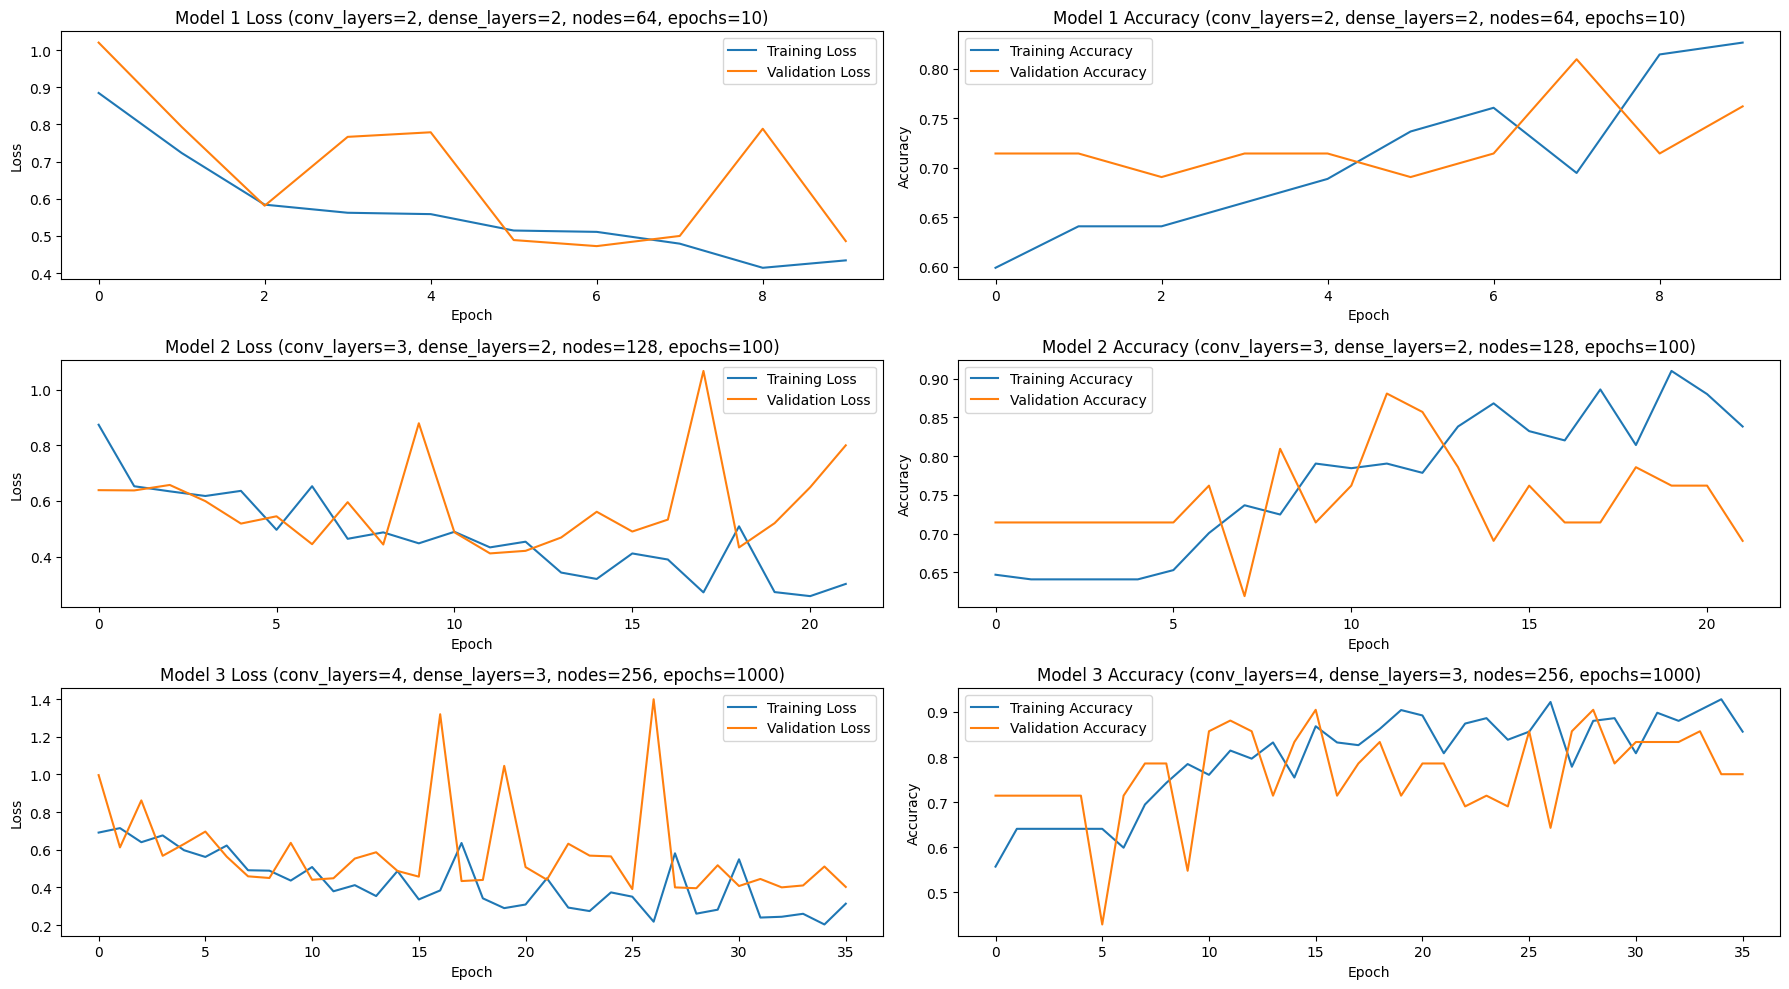

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Reshape the data from 1D to 2D
X_train = X_train.reshape(-1, 64, 64, 3)
X_test = X_test.reshape(-1, 64, 64, 3)

# Check if rescaling is necessary
if X_train.max() > 1:
    print("Rescaling is necessary")
    need_rescaling = True
else:
    print("Data is already scaled")
    need_rescaling = False

def build_and_train_model(conv_layers, dense_layers, nodes, activation, epochs):
    model = Sequential()

    # Add rescaling layer if necessary
    if need_rescaling:
        model.add(Rescaling(1./255, input_shape=(64, 64, 3)))
    else:
        model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

    # Add convolutional layers
    for _ in range(conv_layers - 1):
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D())

    # Flatten the output
    model.add(Flatten())

    # Add dense layers
    for _ in range(dense_layers):
        if activation == 'leaky_relu':
            model.add(Dense(nodes))
            model.add(LeakyReLU(alpha=0.1))
        else:
            model.add(Dense(nodes, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    # Set up callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_cat_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=0)

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        batch_size=32,
        validation_split=0.2,
        epochs=epochs,
        callbacks=[early_stopping, model_checkpoint],
        verbose=0
    )

    return model, history

# Train and plot for different configurations
configurations = [
    {'conv_layers': 2, 'dense_layers': 2, 'nodes': 64, 'activation': 'relu', 'epochs': 10},
    {'conv_layers': 3, 'dense_layers': 2, 'nodes': 128, 'activation': 'relu', 'epochs': 100},
    {'conv_layers': 4, 'dense_layers': 3, 'nodes': 256, 'activation': 'leaky_relu', 'epochs': 1000}
]

plt.figure(figsize=(18, 10))

for i, config in enumerate(configurations):
    model, history = build_and_train_model(config['conv_layers'], config['dense_layers'], config['nodes'], config['activation'], config['epochs'])

    # Plot Loss/Metrics
    plt.subplot(3, 2, i*2+1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Model {i+1} Loss (conv_layers={config['conv_layers']}, dense_layers={config['dense_layers']}, nodes={config['nodes']}, epochs={config['epochs']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(3, 2, i*2+2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Model {i+1} Accuracy (conv_layers={config['conv_layers']}, dense_layers={config['dense_layers']}, nodes={config['nodes']}, epochs={config['epochs']})")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

Prediction step. Make sure you use ```yhat_train``` and ```yhat_test``` variable names for your predictions!

In [ ]:
yhat_train = model.predict(X_train, verbose=0)
yhat_test = model.predict(X_test, verbose=0)

# Print the first few predictions
print("Train Predictions:", yhat_train[:5])
print("Test Predictions:", yhat_test[:5])

Train Predictions: [[4.1560233e-01]
 [1.5704450e-01]
 [8.1682003e-01]
 [3.6136887e-06]
 [2.9064996e-02]]
Test Predictions: [[0.7929157 ]
 [0.79991746]
 [0.66682935]
 [0.35379633]
 [0.8095959 ]]


### 3.2) Calculate your accuracy (10 points)
Here you will use both your classification report and your confusion matrix. </br>
Later you will be asked to calculate values manually. You are welcome to pull values from your reports.

Training Accuracy: 0.9139
Test Accuracy: 0.8400

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.96      0.79      0.87        33

    accuracy                           0.84        50
   macro avg       0.83      0.86      0.83        50
weighted avg       0.87      0.84      0.84        50


Confusion Matrix (Test Set):
[[16  1]
 [ 7 26]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       137
           1       0.84      0.93      0.88        72

    accuracy                           0.91       209
   macro avg       0.90      0.92      0.91       209
weighted avg       0.92      0.91      0.91       209


Confusion Matrix (Training Set):
[[124  13]
 [  5  67]]


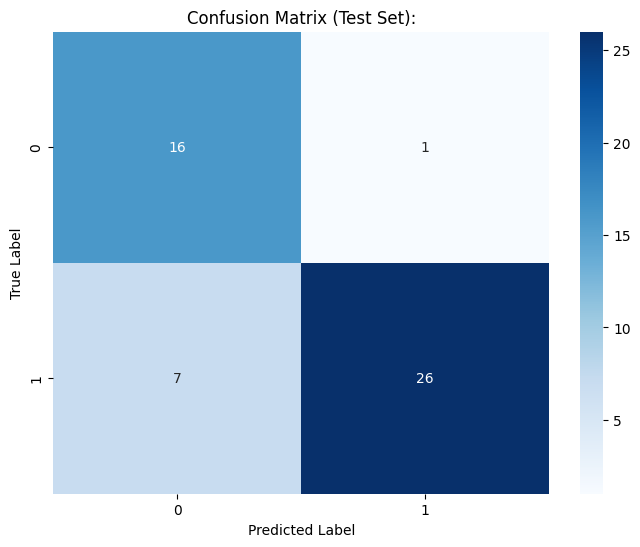

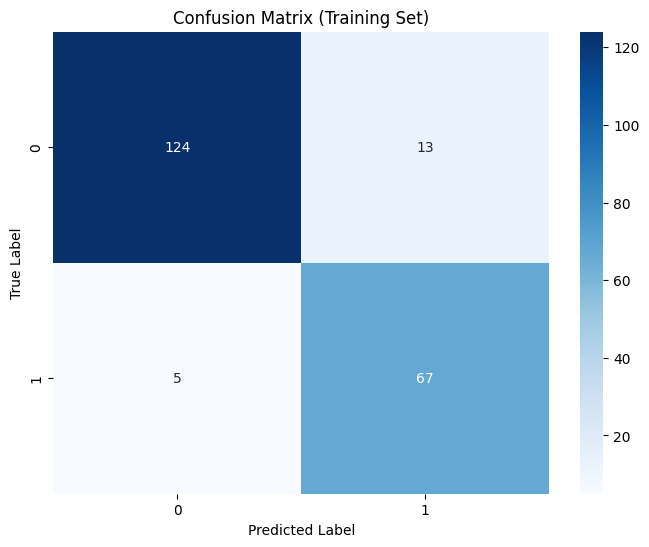

In [ ]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
# labels=np.unique(yhat_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure predictions are thresholded
yhat_train = (yhat_train > 0.5).astype(int)
yhat_test = (yhat_test > 0.5).astype(int)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, yhat_test, labels=np.unique(yhat_test)))

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_test, yhat_test)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix)

# Generate classification report for training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, yhat_train, labels=np.unique(yhat_train)))

# Generate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, yhat_train)
print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

# Visualize confusion matrix for test set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set):')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 3.3) Calculate your precision and recall manually as done in SA1. You cannot use values from your classification report or confusion matrix (10 points)

In [ ]:
# Recall calculation
def manual_recall(y_true, y_pred):
    # Convert to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate True Positives (TP)
    TP = np.sum((y_true == 1) & (y_pred == 1))

    # Calculate False Negatives (FN)
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Calculate Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return recall

# Calculate recall for training set
train_recall = manual_recall(y_train, yhat_train)

# Calculate recall for test set
test_recall = manual_recall(y_test, yhat_test)

print("Training Set Recall:", train_recall)
print("Test Set Recall:", test_recall)

Training Set Recall: 0.9305555555555556
Test Set Recall: 0.7878787878787878


In [ ]:
# Precision calculation
def manual_precision(y_true, y_pred):
    # Convert to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate True Positives (TP)
    TP = np.sum((y_true == 1) & (y_pred == 1))

    # Calculate False Positives (FP)
    FP = np.sum((y_true == 0) & (y_pred == 1))

    # Calculate Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    return precision

# Calculate precision for training set
train_precision = manual_precision(y_train, yhat_train)

# Calculate precision for test set
test_precision = manual_precision(y_test, yhat_test)

print("Training Set Precision:", train_precision)
print("Test Set Precision:", test_precision)

Training Set Precision: 0.8375
Test Set Precision: 0.9629629629629629


### Let's plot!!!

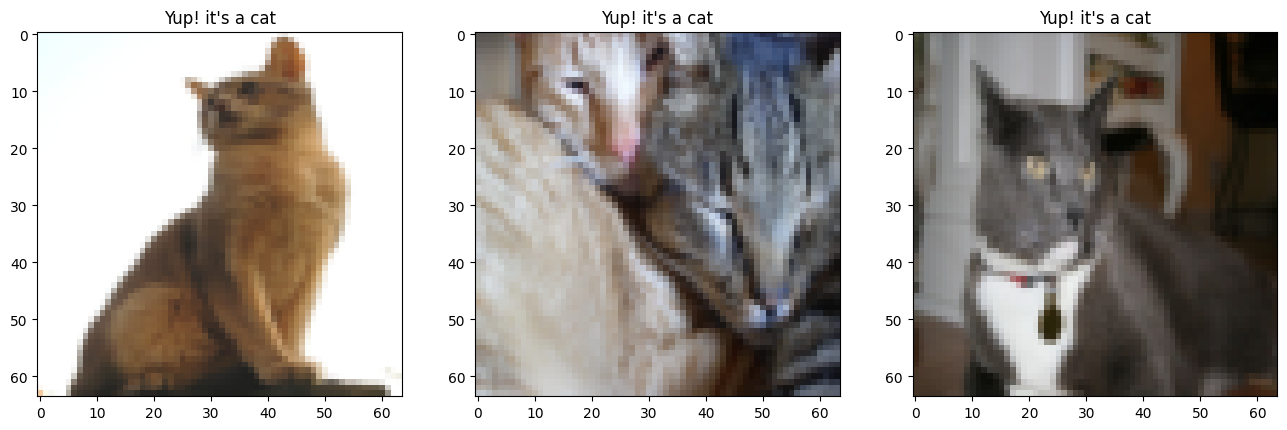

In [ ]:
n = 3 # number of images to print
imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## 4) Collaborative Statement (5 points)
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Even if you did not use any outside resources or collaborate with anyone, please state that explicitly in the space below.

I worked independently on this assignment and did not collaborate with anyone. I followed the academic honesty guidelines and focused solely on my own analysis and coding practices.

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

## Apendix: For your reference

### Generating Rose Data

In [ ]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [ ]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [ ]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Updates to Questions and Dataset, Conversion to google colab, conversion to Tensorflow and Keras and preprocessing data to work with Keras.
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis
